In [ ]:
#https://www.kaggle.com/code/akhalaf/ahmad-final-project-hotelbooking-eda/input

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Predicting Hotel Booking Cancellations.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


Here's a quick summary of the columns

- **is_canceled**: Whether the booking was canceled (1) or kept (0)
- **lead_time**: Number of days between booking date and arrival date
- **arrival_date_year**: Year of arrival date
- **arrival_date_month**: Month of arrival date
- **arrival_date_week_number**: Week number of arrival date
- **arrival_date_day_of_month**: Day of the month of arrival date
- **stays_in_weekend_nights**: Number of weekend nights booked (Sat-Sun)
- **stay_in_week_nights**: Number of weekday nights booked (Mon-Fri)
- **adults**: Number of adults
- **children**: Number of children
- **babies**: Number of babies
- **meal**: Type of meal booked (Undefined/SC, BB, HB, or FB)
- **country**: Country of origin of the booker
- **market_segment**: Market segment (TA - travel agent, TO - tour operators)
- **distribution_channel**: Booking distribution channel (TA - travel agent, TO - tour operators)
- **is_repeated_guest**: Is this a repeated guest (1) or not (0)
- **previous_cancellations**: The number of previous bookings canceled by the customer
- **previous_bookings_not_canceled**: The number of previous bookings not canceled by the customer
- **reserved_room_type**: Room type reserved
- **assigned_room_type**: Type of assigned room booked
- **booking_changes**: Number of booking changes or modifications
- **deposit_type**: Type of deposit to guarantee booking (No Deposit, Non Refund, or Refundable)
- **agent**: ID of the travel agency that made the booking
- **company**: ID of the company that made the booking
- **days_in_waiting_list**: Number of days booking was waitlisted before confirmation
- **customer_type**: The customer type of booking (Contract, Group, Transient, or Transient-party)
- **adr**: The average daily rate (cost) of the booking
- **required_car_parking_spaces**: Number of parking spaces requested by the customer
- **total_of_special_requests**: Number of special requests by the customer
- **reservation_status**: The last reservation status (Canceled, Check-Out, No-Show)
- **reservation_status_date**: The date of the last reservation status

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Totla Count:- 
is_canceled
0    75166
1    44224
Name: count, dtype: int64


Proportion:- 
is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


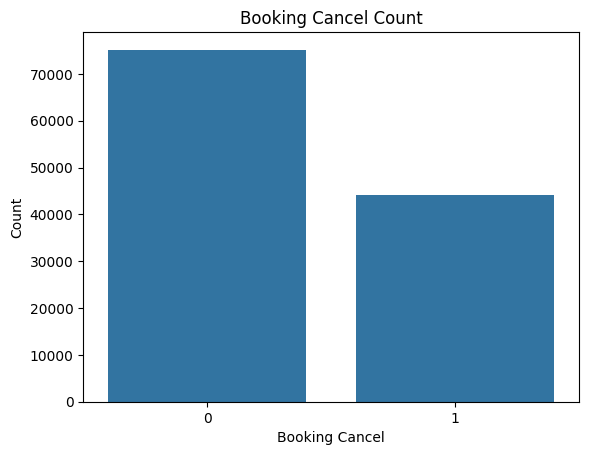

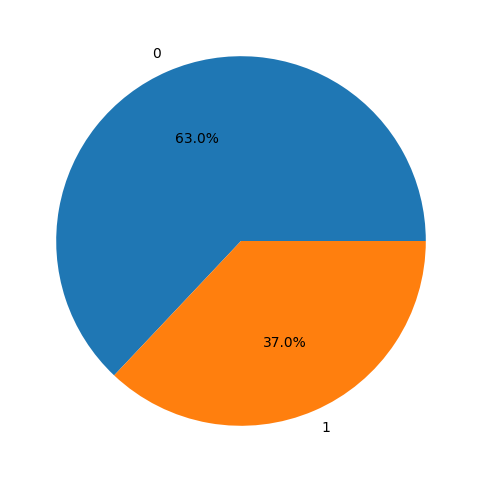

In [ ]:
print("Totla Count:- ")
print(df['is_canceled'].value_counts())
print("\n")
print("Proportion:- ")
print(df['is_canceled'].value_counts(1))

sns.countplot(x = 'is_canceled', data = df)
plt.title('Booking Cancel Count')
plt.xlabel('Booking Cancel')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
plt.pie(df['is_canceled'].value_counts().values , labels = df['is_canceled'].value_counts().index, autopct = '%1.1f%%')
plt.show()

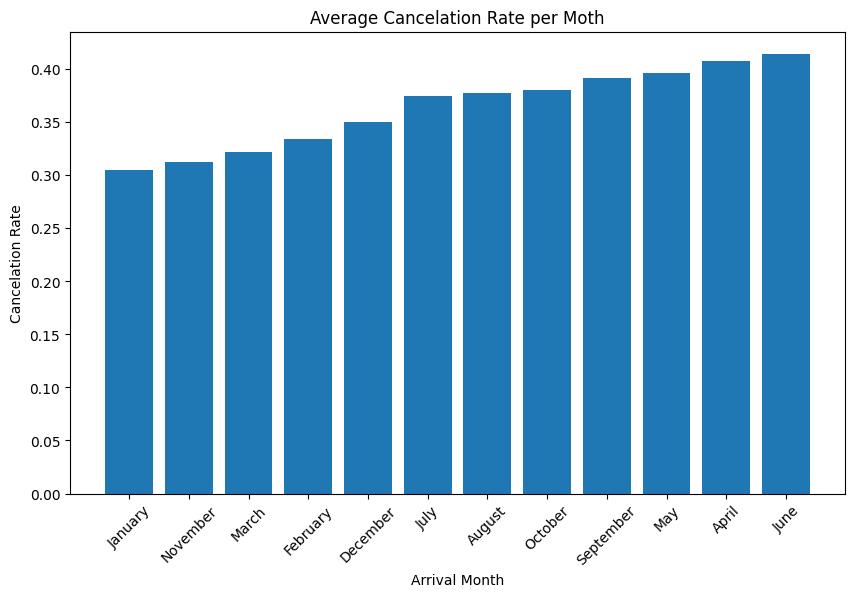

In [ ]:
cancel_per_month = df.groupby('arrival_date_month')['is_canceled'].mean()
cancel_per_month = cancel_per_month.sort_values()

plt.figure(figsize=(10, 6))
plt.bar(cancel_per_month.index, cancel_per_month.values)
plt.title('Average Cancelation Rate per Moth')
plt.xlabel('Arrival Month')
plt.ylabel('Cancelation Rate')
plt.xticks(rotation=45)
plt.show()


In [ ]:
obj_col = ['arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
remove_col = ['country', 'agent', 'company', 'reservation_status_date', 'arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_year']

In [ ]:
df = df.drop(remove_col, axis = 1)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [ ]:
df['meal'] = df['meal'].replace({'Undefined':0, 'SC':0, 'BB':1, 'HB':2, 'FB':3})

/tmp/ipython-input-1248690039.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['meal'] = df['meal'].replace({'Undefined':0, 'SC':0, 'BB':1, 'HB':2, 'FB':3})


In [ ]:
one_hot_columns =  ['arrival_date_month', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'market_segment']
df = pd.get_dummies(df, columns = one_hot_columns, dtype = int)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,...,customer_type_Transient,customer_type_Transient-Party,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,Resort Hotel,0,342,0,0,2,0.0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,Resort Hotel,0,737,0,0,2,0.0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
df['children']=df['children'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 72 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119390 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  int64  
 9   is_repeated_guest               119390 non-null  int64  
 10  previous_cancellations          119390 non-null  int64  
 11  previous_bookings_not_canceled  119390 non-null  int64  
 12  booking_changes 

In [ ]:
remove_cols = ['is_canceled', 'reservation_status']

train_features = [x for x in df.columns if x not in remove_cols]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [ ]:
#Naive Bayes
X=df.drop(columns=['is_canceled'])
y=df['is_canceled']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)
acc=accuracy_score(y_test,y_pred)
cla=classification_report(y_test,y_pred)
print(cla)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22478
           1       0.97      1.00      0.98     13339

    accuracy                           0.99     35817
   macro avg       0.98      0.99      0.99     35817
weighted avg       0.99      0.99      0.99     35817



In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix) 

[[22050   428]
 [    0 13339]]
